In [132]:
import json
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt

# 0. Leemos los datos

In [156]:
def read_json(path):
    with open(path) as f:
        data = json.load(f)
    return data

path = 'data\mpd.slice.0-999.json'
data = read_json(path)

In [161]:
playlist = pd.DataFrame(data['playlists'])
playlist.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,Throwbacks,false,0,1493424000,52,47,1,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",6,11532414,37,NaN
1,Awesome Playlist,false,1,1506556800,39,23,1,"[{'pos': 0, 'artist_name': 'Survivor', 'track_...",5,11656470,21,NaN
2,korean,false,2,1505692800,64,51,1,"[{'pos': 0, 'artist_name': 'Hoody', 'track_uri...",18,14039958,31,NaN
3,mat,false,3,1501027200,126,107,1,"[{'pos': 0, 'artist_name': 'Camille Saint-Saën...",4,28926058,86,NaN
4,90s,false,4,1401667200,17,16,2,"[{'pos': 0, 'artist_name': 'The Smashing Pumpk...",7,4335282,16,NaN


In [162]:
expanded_tracks_df = pd.DataFrame()

# Iterar sobre cada fila y expandir los datos JSON en un dataframe
for index, row in playlist.iterrows():
    # Cargar el JSON desde la columna 'tracks'
    tracks = row['tracks']
    
    # Comprobar si 'tracks' es una cadena que necesita ser convertida de JSON
    if isinstance(tracks, str):
        try:
            tracks = json.loads(tracks)  # Cargar la cadena JSON
        except json.JSONDecodeError:
            tracks = []  # En caso de error, usar una lista vacía
    elif not isinstance(tracks, list):
        tracks = []  # Asegurar que tracks sea una lista si no es una cadena

    if tracks:
        track_data = json_normalize(tracks)
        track_data['pid'] = row['pid']  # añadimos el id de la playlist para mantener la referencia
        expanded_tracks_df = pd.concat([expanded_tracks_df, track_data], ignore_index=True)


In [163]:
playlist.drop("tracks", axis=1, inplace=True)
playlist.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,description
0,Throwbacks,false,0,1493424000,52,47,1,6,11532414,37,NaN
1,Awesome Playlist,false,1,1506556800,39,23,1,5,11656470,21,NaN
2,korean,false,2,1505692800,64,51,1,18,14039958,31,NaN
3,mat,false,3,1501027200,126,107,1,4,28926058,86,NaN
4,90s,false,4,1401667200,17,16,2,7,4335282,16,NaN


In [164]:
playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           1000 non-null   object
 1   collaborative  1000 non-null   object
 2   pid            1000 non-null   int64 
 3   modified_at    1000 non-null   int64 
 4   num_tracks     1000 non-null   int64 
 5   num_albums     1000 non-null   int64 
 6   num_followers  1000 non-null   int64 
 7   num_edits      1000 non-null   int64 
 8   duration_ms    1000 non-null   int64 
 9   num_artists    1000 non-null   int64 
 10  description    20 non-null     object
dtypes: int64(8), object(3)
memory usage: 86.1+ KB


In [165]:
expanded_tracks_df.head()

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,pid
0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0
1,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,0
2,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit),0
3,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified,0
4,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot,0


In [166]:
expanded_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67503 entries, 0 to 67502
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pos          67503 non-null  int64 
 1   artist_name  67503 non-null  object
 2   track_uri    67503 non-null  object
 3   artist_uri   67503 non-null  object
 4   track_name   67503 non-null  object
 5   album_uri    67503 non-null  object
 6   duration_ms  67503 non-null  int64 
 7   album_name   67503 non-null  object
 8   pid          67503 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 4.6+ MB


# 1. Analisis Exploratorio

In [167]:
playlist

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,description
0,Throwbacks,false,0,1493424000,52,47,1,6,11532414,37,NaN
1,Awesome Playlist,false,1,1506556800,39,23,1,5,11656470,21,NaN
2,korean,false,2,1505692800,64,51,1,18,14039958,31,NaN
3,mat,false,3,1501027200,126,107,1,4,28926058,86,NaN
4,90s,false,4,1401667200,17,16,2,7,4335282,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...
995,old,false,995,1507852800,41,40,1,8,9917901,36,NaN
996,Daze,false,996,1479254400,17,17,1,13,3699248,15,NaN
997,rap,false,997,1410307200,119,98,1,63,27538723,82,NaN
998,Country,false,998,1507939200,108,75,1,37,24950143,40,NaN


In [168]:
expanded_tracks_df

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,pid
0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0
1,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,0
2,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit),0
3,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified,0
4,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot,0
...,...,...,...,...,...,...,...,...,...
67498,39,James Arthur,spotify:track:5uCax9HTNlzGybIStD3vDh,spotify:artist:4IWBUUAFIplrNtaOHcJPRM,Say You Won't Let Go,spotify:album:7oiJYvEJHsmYtrgviAVIBD,211466,Back from the Edge,999
67499,40,Big Words,spotify:track:0P1oO2gREMYUCoOkzYAyFu,spotify:artist:0sHN89qak07mnug3LVVjzP,The Answer,spotify:album:5jrsRHRAmetu5e7RRBoxj7,263679,"Hollywood, a Beautiful Coincidence",999
67500,41,Allan Rayman,spotify:track:2oM4BuruDnEvk59IvIXCwn,spotify:artist:6Yv6OBXD6ZQakEljaGaDAk,25.22,spotify:album:3CbNgBzI7r9o0F6VjH9sTY,189213,Roadhouse 01,999
67501,42,Jon Jason,spotify:track:4Ri5TTUgjM96tbQZd5Ua7V,spotify:artist:77bNdkKYBBmc30CisCA6tE,Good Feeling,spotify:album:2dZ7oVNQBeLlpoUYfbEsJP,194720,Good Feeling,999


In [169]:
by_playlist = expanded_tracks_df.groupby('pid').agg(
    num_songs=('track_name', 'count'),  # Contamos el número de canciones por playlist
    avg_duration=('duration_ms', 'mean'),  # Calculamos la duración media de las canciones
    artists=('artist_name', lambda x: set(x)),  # Obtenemos un conjunto de artistas únicos
    songs =('track_name', lambda x: set(x)),  # Obtenemos un conjunto de caciones únicas
    albums =('album_name', lambda x: set(x))  # Obtenemos un conjunto de albumes únicos
)

by_playlist['avg_duration'] = by_playlist['avg_duration'] / 60000 # Convertimos la duración de milisegundos a minutos
by_playlist.head()

,num_songs,avg_duration,artists,songs,albums
pid,,,,,
0,52,3.696287,"{The Pussycat Dolls, Missy Elliott, Shaggy, De...","{Leavin', Paper Planes, Yo (Excuse Me Miss), C...","{The Cookbook, Departure - Recharged, Dangerou..."
1,39,4.981397,"{Toto, The Rolling Stones, Queen, Creedence Cl...","{Concerning Hobbits (The Lord of the Rings), Y...","{Eye Of The Tiger, Toto, Beggars Banquet, Phys..."
2,64,3.656239,"{AKDONG MUSICIAN, JIMIN (AOA), Lovelyz, KARD, ...","{사실은 The Truth Is, Your Eyes (feat. Jay Park),...","{꺼내 먹어요 (Eat) - Single, Play, Solar, Heartstri..."
3,126,3.826198,"{Chairlift, Rogue Wave, Moose, The Preatures, ...","{Fortune Only, So Much Love So Little Time, Sc...","{French Festival, soft & wet, ALL-AMERICAN TRA..."
4,17,4.250276,"{The Verve Pipe, Toni Braxton, Soul Asylum, Ae...","{Runaway Train, Tonight, Tonight, Stay, Breath...","{Mellon Collie and the Infinite Sadness, Grave..."


In [170]:
by_playlist.describe()   

,num_songs,avg_duration
count,1000.00000,1000.000000
mean,67.50300,3.888583
std,55.00334,0.456293
min,5.00000,1.693507
25%,25.00000,3.644765
50%,50.00000,3.847286
75%,92.50000,4.090800
max,245.00000,6.852478


In [171]:
by_playlist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_songs     1000 non-null   int64  
 1   avg_duration  1000 non-null   float64
 2   artists       1000 non-null   object 
 3   songs         1000 non-null   object 
 4   albums        1000 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 46.9+ KB


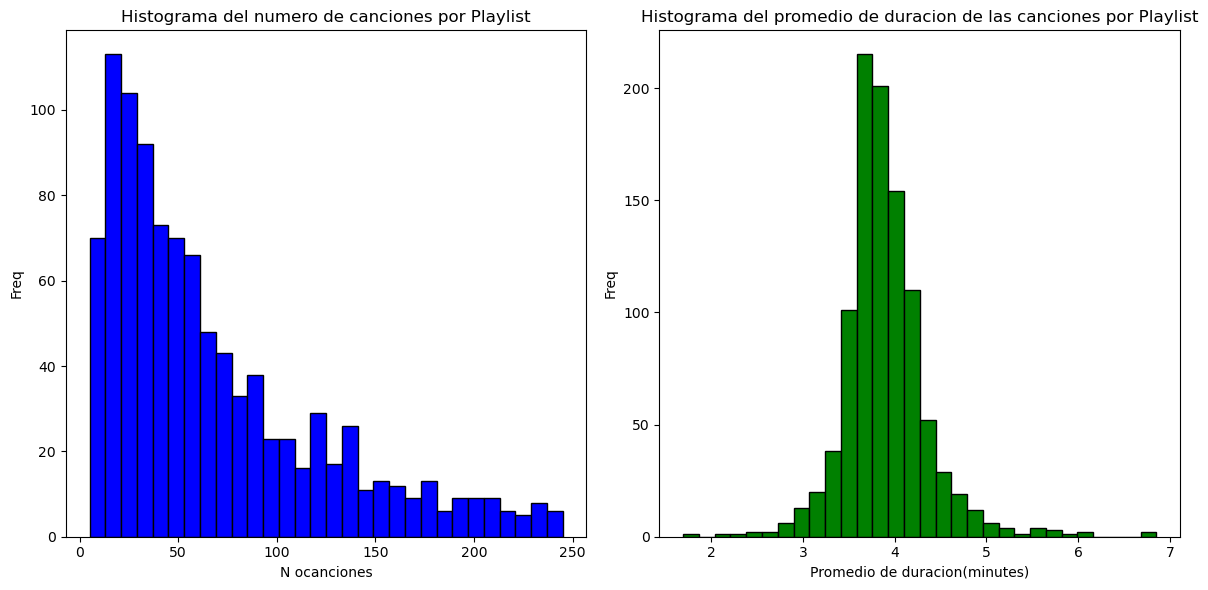

In [175]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Primer subplot para 'num_songs'
ax1.hist(by_playlist['num_songs'], bins=30, color='blue', edgecolor='black')
ax1.set_title('Histograma del numero de canciones por Playlist')
ax1.set_xlabel('N ocanciones')
ax1.set_ylabel('Freq')

# Segundo subplot para 'avg_duration'
ax2.hist(by_playlist['avg_duration'], bins=30, color='green', edgecolor='black')
ax2.set_title('Histograma del promedio de duracion de las canciones por Playlist')
ax2.set_xlabel('Promedio de duracion(minutes)')
ax2.set_ylabel('Freq')

# Ajustar el layout para evitar la superposición de elementos
plt.tight_layout()

# Mostrar la figura con ambos subplots
plt.show()

In [173]:
n_artists = len(expanded_tracks_df["artist_name"].unique())
n_albums = len(expanded_tracks_df["album_name"].unique())
n_songs = len(expanded_tracks_df["track_name"].unique())

print(f"Número de artistas únicos: {n_artists}, Número de canciones únicas: {n_songs}, Número de albumes únicos: {n_albums}")

Número de artistas únicos: 9722, Número de canciones únicas: 30049, Número de albumes únicos: 17437


In [195]:
playlist_per_song = expanded_tracks_df.groupby('track_name')['pid'].agg(list).reset_index()
playlist_per_song.head()

,track_name,pid
0,"""40"" - Remastered 2008",[451]
1,"""45""",[138]
2,"""A Lovely Night""",[811]
3,"""A Lovely Night"" (Reprise)",[811]
4,"""Can't Repeat The Past?""",[301]


In [196]:
playlist_per_song['n_playlists'] = playlist_per_song['pid'].apply(lambda x: len(set(x)))

In [197]:
playlist_per_song["n_playlists"].mean()

2.2093580485207496

In [198]:
playlist_per_song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30049 entries, 0 to 30048
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   track_name   30049 non-null  object
 1   pid          30049 non-null  object
 2   n_playlists  30049 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 704.4+ KB


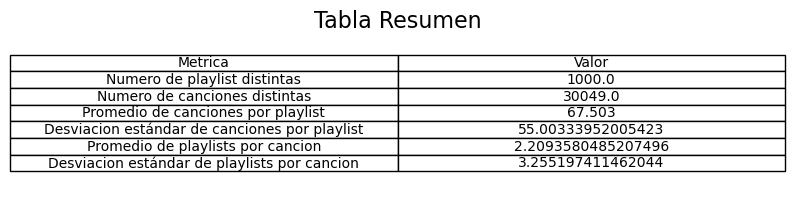

In [199]:
metricas = {
    'Metrica': ['Numero de playlist distintas', 'Numero de canciones distintas',
                'Promedio de canciones por playlist', 'Desviacion estándar de canciones por playlist',
                'Promedio de playlists por cancion', 'Desviacion estándar de playlists por cancion'],
    'Valor': [by_playlist.shape[0], n_songs, by_playlist["num_songs"].mean(), by_playlist["num_songs"].std(), 
              playlist_per_song["n_playlists"].mean(), playlist_per_song["n_playlists"].std()]
}

df = pd.DataFrame(metricas)

fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('off')
tabla = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colWidths=[0.5, 0.5])
plt.title('Tabla Resumen', fontsize=16)
plt.show()

# 2. Baseline

In [ ]:
def evaluar_bpr(dimension):
    modelo = BayesianPersonalizedRanking(factors=dimension)
    modelo.fit(interacciones_train)
    mapk = mean_average_precision_at_k(modelo, train_user_items=interacciones_train, test_user_items=interacciones_val, K=10)
    ndcgk = ndcg_at_k(modelo, train_user_items=interacciones_train, test_user_items=interacciones_val, K=10)
    return mapk, ndcgk
